In [1]:
import numpy as np
import pandas as pd
# from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')
# import sklearn

In [2]:
import os

In [3]:
os.chdir('G:/내 드라이브/Github/SWuniv_AI_preliminary_contest/data')

In [4]:
# submission.to_csv("baseline.csv", index = False)

---

In [5]:
train  = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')

train = train.drop(['index', 'country'],axis = 1)
test =test.drop(['index', 'country'],axis = 1)

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [7]:

concat_features = train

mask = concat_features.introelapse > (concat_features.introelapse.quantile(0.75) + 1.5 * (concat_features.introelapse.quantile(0.75) - concat_features.introelapse.quantile(0.25)))
concat_features.introelapse[mask] = concat_features.introelapse.quantile(0.75)

mask = concat_features.testelapse > (concat_features.testelapse.quantile(0.75) + 1.5 * (concat_features.testelapse.quantile(0.75) - concat_features.testelapse.quantile(0.25)))
concat_features.testelapse[mask] = concat_features.testelapse.quantile(0.75)

mask = concat_features.surveyelapse > (concat_features.surveyelapse.quantile(0.75) + 1.5 * (concat_features.surveyelapse.quantile(0.75) - concat_features.surveyelapse.quantile(0.25)))
concat_features.surveyelapse[mask] = concat_features.surveyelapse.quantile(0.75)

train = concat_features



concat_features = test

mask = concat_features.introelapse > (concat_features.introelapse.quantile(0.75) + 1.5 * (concat_features.introelapse.quantile(0.75) - concat_features.introelapse.quantile(0.25)))
concat_features.introelapse[mask] = concat_features.introelapse.quantile(0.75)

mask = concat_features.testelapse > (concat_features.testelapse.quantile(0.75) + 1.5 * (concat_features.testelapse.quantile(0.75) - concat_features.testelapse.quantile(0.25)))
concat_features.testelapse[mask] = concat_features.testelapse.quantile(0.75)

mask = concat_features.surveyelapse > (concat_features.surveyelapse.quantile(0.75) + 1.5 * (concat_features.surveyelapse.quantile(0.75) - concat_features.surveyelapse.quantile(0.25)))
concat_features.surveyelapse[mask] = concat_features.surveyelapse.quantile(0.75)

test = concat_features


In [8]:
for name in ['education', 'urban', 'gender', 'engnat', 'hand', 'religion',
            'voted', 'married']:

    mergedata = pd.get_dummies(train[name], prefix = name)
    train = pd.concat([train, mergedata], axis=1)
    train = train.drop([name], axis = 1)

In [9]:
for name in ['education', 'urban', 'gender', 'engnat', 'hand', 'religion',
            'voted', 'married']:

    mergedata = pd.get_dummies(test[name], prefix = name)
    test = pd.concat([test, mergedata], axis=1)
    test = test.drop([name], axis = 1)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 93 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Q1             14959 non-null  float64
 1   Q2             14931 non-null  float64
 2   Q3             14950 non-null  float64
 3   Q4             14929 non-null  float64
 4   Q5             14962 non-null  float64
 5   Q6             14952 non-null  float64
 6   Q7             14924 non-null  float64
 7   Q8             14952 non-null  float64
 8   Q9             14944 non-null  float64
 9   Q10            14928 non-null  float64
 10  Q11            14941 non-null  float64
 11  Q12            14933 non-null  float64
 12  Q13            14960 non-null  float64
 13  Q14            14964 non-null  float64
 14  Q15            14955 non-null  float64
 15  Q16            14967 non-null  float64
 16  Q17            14963 non-null  float64
 17  Q18            14937 non-null  float64
 18  Q19   

<AxesSubplot:>

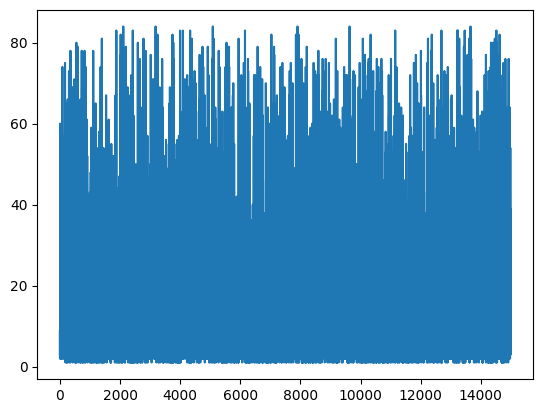

In [11]:
train.introelapse.plot()

In [12]:
train['Ex'] = train['TIPI1']-train['TIPI6']
train['Ag'] = train['TIPI7']-train['TIPI2']
train['Con'] = train['TIPI3']-train['TIPI8']
train['Es'] =train['TIPI9']-train['TIPI4']
train['Op'] =train['TIPI5']-train['TIPI10']

In [13]:
test['Ex'] = test['TIPI1']-test['TIPI6']
test['Ag'] = test['TIPI7']-test['TIPI2']
test['Con'] = test['TIPI3']-test['TIPI8']
test['Es'] =test['TIPI9']-test['TIPI4']
test['Op'] =test['TIPI5']-test['TIPI10']

In [14]:
train = train.drop(['TIPI1','TIPI2','TIPI3','TIPI4','TIPI5',
                   'TIPI6','TIPI7','TIPI8','TIPI9','TIPI10'],axis = 1)

test = test.drop(['TIPI1','TIPI2','TIPI3','TIPI4','TIPI5',
                   'TIPI6','TIPI7','TIPI8','TIPI9','TIPI10'],axis = 1)

In [15]:
train_x=train.drop(['nerdiness'], axis=1)
train_y=train['nerdiness']

In [16]:
train_x

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,voted_1.0,voted_2.0,married_1.0,married_2.0,married_3.0,Ex,Ag,Con,Es,Op
0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,3.0,...,0,1,1,0,0,-1.0,2.0,2.0,4.0,0.0
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,...,1,0,0,1,0,2.0,3.0,2.0,-3.0,1.0
2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,4.0,...,0,1,0,0,1,-4.0,1.0,-1.0,4.0,3.0
3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,4.0,...,0,1,1,0,0,0.0,1.0,-1.0,-1.0,2.0
4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,4.0,...,0,1,1,0,0,-1.0,0.0,0.0,-1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,...,0,1,1,0,0,-3.0,1.0,1.0,0.0,0.0
14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,...,1,0,0,1,0,0.0,2.0,3.0,-3.0,2.0
14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,...,1,0,1,0,0,-4.0,0.0,-1.0,-4.0,0.0
14998,5.0,5.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,...,0,1,0,1,0,-4.0,4.0,-1.0,-3.0,3.0


---

In [17]:
# pip install pycaret

In [18]:
from pycaret.classification import *

In [20]:
# 'voted' 컬럼이 예측 대상이므로 target 인자에 명시
# 'voted' column is the target variable
clf = setup(data = train, target = 'nerdiness')

,Description,Value
0,session_id,7999
1,Target,nerdiness
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(15000, 88)"
5,Missing Values,True
6,Numeric Features,37
7,Categorical Features,50
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
# best_3 = compare_models(sort = 'AUC', n_select = 3)

In [21]:
best_2 = compare_models(sort = 'AUC', n_select = 2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7615,0.8527,0.8283,0.7635,0.7944,0.5115,0.5142,0.8770
rf,Random Forest Classifier,0.7641,0.8498,0.8320,0.7649,0.7969,0.5167,0.5196,0.6290
lightgbm,Light Gradient Boosting Machine,0.7446,0.8153,0.8088,0.7514,0.7789,0.4776,0.4796,0.2020
gbc,Gradient Boosting Classifier,0.7318,0.7975,0.7978,0.7405,0.7679,0.4512,0.4533,2.0330
lr,Logistic Regression,0.7239,0.7940,0.7846,0.7364,0.7596,0.4360,0.4374,2.5120
lda,Linear Discriminant Analysis,0.7245,0.7929,0.7903,0.7347,0.7613,0.4364,0.4384,0.4620
ada,Ada Boost Classifier,0.7179,0.7850,0.7747,0.7335,0.7534,0.4244,0.4255,0.5530
nb,Naive Bayes,0.6827,0.7374,0.7738,0.6925,0.7306,0.3475,0.3513,0.0480
dt,Decision Tree Classifier,0.6795,0.6757,0.7096,0.7133,0.7112,0.3511,0.3514,0.1700
knn,K Neighbors Classifier,0.5753,0.5845,0.6776,0.6057,0.6395,0.1265,0.1279,0.3750


In [21]:
best_2 = compare_models(sort = 'Accuracy', n_select = 2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7660,0.8555,0.8205,0.7686,0.7936,0.5241,0.5258,0.8490
rf,Random Forest Classifier,0.7633,0.8507,0.8194,0.7656,0.7915,0.5185,0.5203,0.6490
lightgbm,Light Gradient Boosting Machine,0.7404,0.8131,0.7989,0.7459,0.7714,0.4717,0.4734,0.2010
gbc,Gradient Boosting Classifier,0.7302,0.7975,0.7871,0.7384,0.7618,0.4513,0.4528,2.0260
lda,Linear Discriminant Analysis,0.7240,0.7928,0.7796,0.7339,0.7560,0.4389,0.4401,0.4250
ridge,Ridge Classifier,0.7233,0.0000,0.7791,0.7332,0.7554,0.4376,0.4388,0.0630
lr,Logistic Regression,0.7232,0.7944,0.7769,0.7342,0.7549,0.4376,0.4386,2.6090
ada,Ada Boost Classifier,0.7181,0.7867,0.7717,0.7300,0.7501,0.4273,0.4284,0.5280
dt,Decision Tree Classifier,0.6807,0.6776,0.7098,0.7089,0.7093,0.3552,0.3554,0.1540
nb,Naive Bayes,0.6792,0.7354,0.7635,0.6871,0.7231,0.3444,0.3474,0.0480


In [20]:
# best_1 = compare_models(sort = 'AUC', n_select = 1)

In [22]:
blended = blend_models(estimator_list = best_2, fold = 4, method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7684,0.8597,0.8326,0.7656,0.7977,0.5279,0.5304
1,0.7543,0.8401,0.8201,0.7537,0.7855,0.4991,0.5016
2,0.7592,0.8447,0.8118,0.7641,0.7872,0.5106,0.5118
3,0.7561,0.8416,0.8186,0.7566,0.7864,0.5032,0.5053
Mean,0.7595,0.8465,0.8208,0.7600,0.7892,0.5102,0.5123
Std,0.0054,0.0078,0.0075,0.0050,0.0050,0.0110,0.0111


In [36]:
# blended = blend_models(estimator_list = best_1, fold = 5, method = 'soft')

In [23]:
pred_holdout = predict_model(blended)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7769,0.8717,0.8333,0.7852,0.8085,0.5419,0.5433


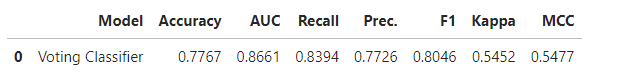

In [24]:
final_model = finalize_model(blended)

In [25]:
predictions = predict_model(final_model, data = test)

In [26]:
predictions['Score']

0        0.955
1        0.775
2        0.825
3        0.595
4        0.930
         ...  
35447    0.880
35448    0.765
35449    0.920
35450    0.900
35451    0.675
Name: Score, Length: 35452, dtype: float64

In [27]:
predictions['Label']

0        0
1        1
2        1
3        1
4        1
        ..
35447    1
35448    1
35449    1
35450    0
35451    1
Name: Label, Length: 35452, dtype: int32

In [28]:
predictions.loc[predictions['Label'] == 0, 'Score'] = 1 - predictions.loc[predictions['Label'] == 0, 'Score']

In [29]:
predictions['Score']

0        0.045
1        0.775
2        0.825
3        0.595
4        0.930
         ...  
35447    0.880
35448    0.765
35449    0.920
35450    0.100
35451    0.675
Name: Score, Length: 35452, dtype: float64

In [30]:
sub = predictions['Score']

In [31]:
sub

0        0.045
1        0.775
2        0.825
3        0.595
4        0.930
         ...  
35447    0.880
35448    0.765
35449    0.920
35450    0.100
35451    0.675
Name: Score, Length: 35452, dtype: float64

In [32]:
submission = pd.read_csv('sample_submission.csv')

submission['nerdiness'] = sub

In [33]:
submission

,index,nerdiness
0,0,0.045
1,1,0.775
2,2,0.825
3,3,0.595
4,4,0.930
...,...,...
35447,35447,0.880
35448,35448,0.765
35449,35449,0.920
35450,35450,0.100


In [34]:
submission.to_csv("FINAL2.csv", index = False)